[***LinkedIn***](https://www.linkedin.com/in/haytam-el-youssfi/) [***Twitter***](https://twitter.com/HaytamYoussfi)

## The Dataset

The dataset consisted of 1376 images, 690 face images with masks and 686 without masks. The original dataset is prepared by Prajna Bhandary and available at [Github](https://github.com/prajnasb/observations/tree/master/experiements/data)

***For more :***
+ [**Face Detection using OpenCV and Python .**](https://github.com/Haytam222/Face-Detection)
+ [**Getting Started with Images and videos .**](https://github.com/Haytam222/OpenCv)
+ [**Convolutional Neural Networks in Python with Keras/Tf .**](https://github.com/Haytam222/Deep-Learning)
+ [**Neural network (Validation-Test/ Loss function / saved model ... )**](https://github.com/Haytam222/Neural-Network)

# Face Mask Detection

In [1]:
import cv2,os 

data_path='dataset'
categories=os.listdir(data_path)

labels=[ i for i in range(len(categories))]
label_dict=dict(zip(categories,labels))

# Data Preprocessing

In [2]:
#Resizing tha images in dataset (150,150)
img_size=150  
data=[] 
target=[] 

for category in categories :
    
    folder_path=os.path.join('dataset',category)
    img_names=os.listdir(folder_path)
    
    for img_name in img_names :
        
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)
        
        try:
            #Coverting the image into gray scale
            gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) 
            resized=cv2.resize(gray,(img_size,img_size))
            #Resizing the gray scale into 150*150, since we need a fixed common size for all the images in the dataset
            data.append(resized)
            target.append(label_dict[category])
            
        except Exception as e :
            #If any exception rasied, the exception will be printed here. And pass to the next image
            print('Exception :',e)
            
        
print(len(target))
print(len(data))

1376
1376


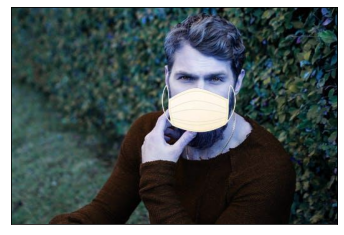

In [3]:
from matplotlib import pyplot as plt
import cv2
img = cv2.imread('dataset/with_mask/0-with-mask.jpg',-1)
#print(img)
plt.imshow(img)
# to hide tick values on X and Y axis
plt.xticks([]), plt.yticks([])
plt.show()

In [4]:
import numpy  as np 

data=np.array(data)/255.0
print(data.shape)
data=np.reshape(data,(data.shape[0],img_size,img_size,1))
print(data.shape)

(1376, 150, 150)
(1376, 150, 150, 1)


In [5]:
target=np.array(target)

In [6]:
from keras.utils import np_utils
# Converts a class vector to binary class matrix , for use with categorical_crossentropy ( Training the CNN ) 
new_target=np_utils.to_categorical(target) 

print(new_target)

Using TensorFlow backend.


[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [7]:
np.save('data',data)
np.save('target',new_target)
